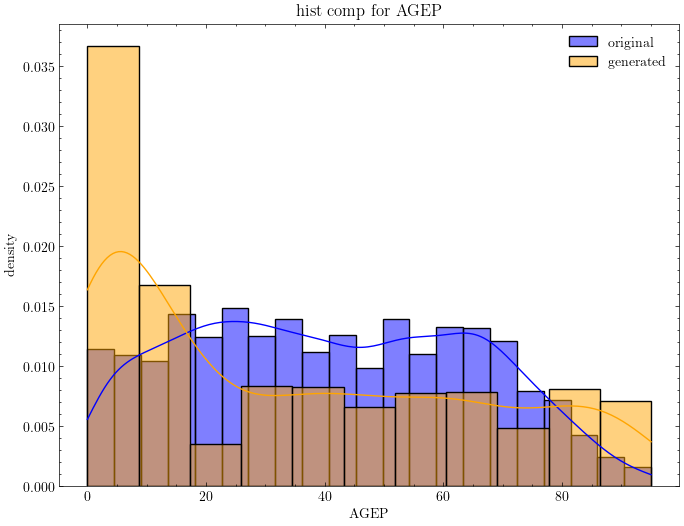

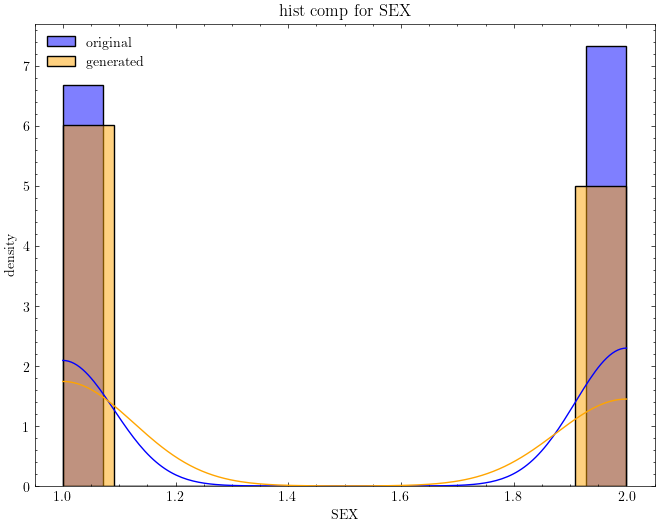

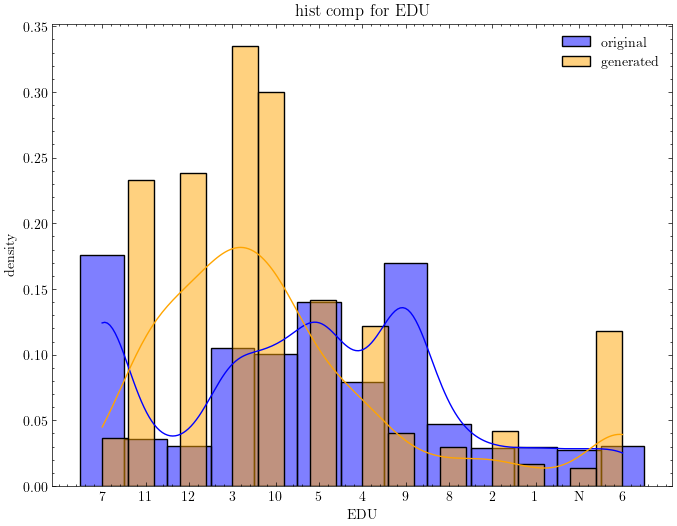

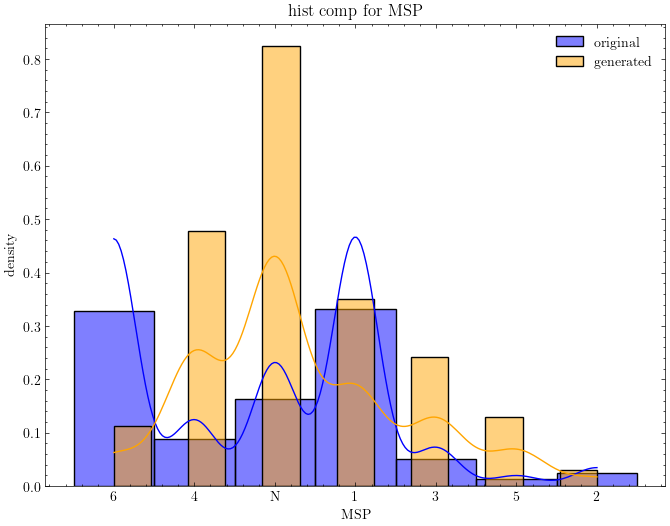

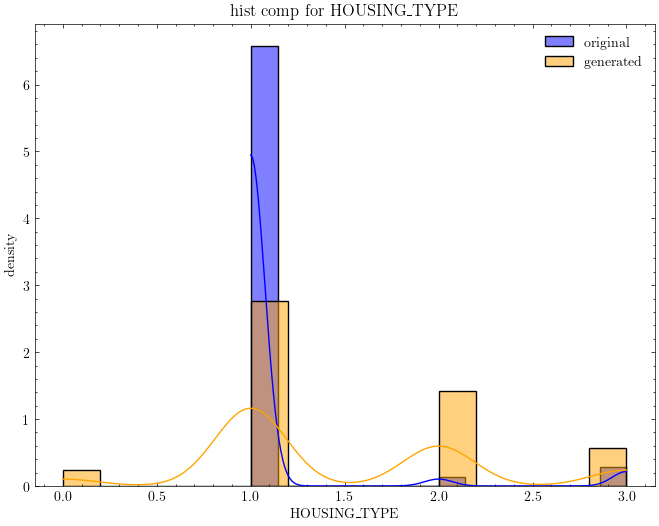

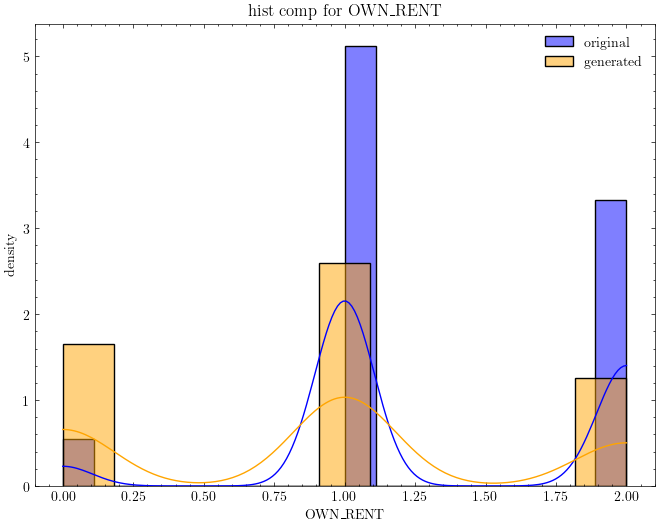

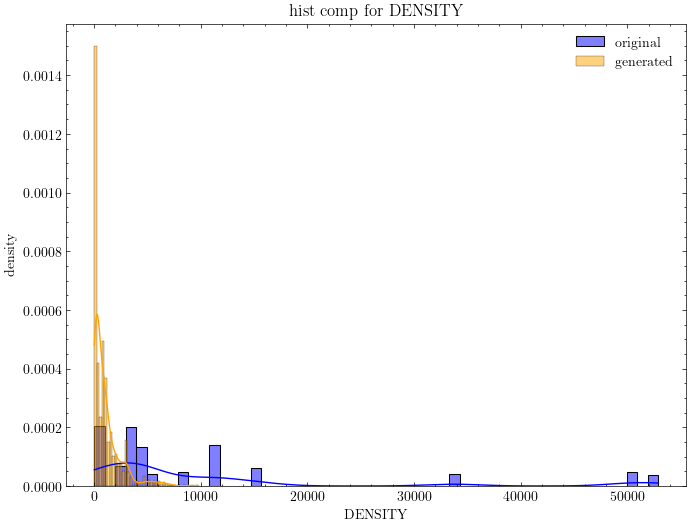

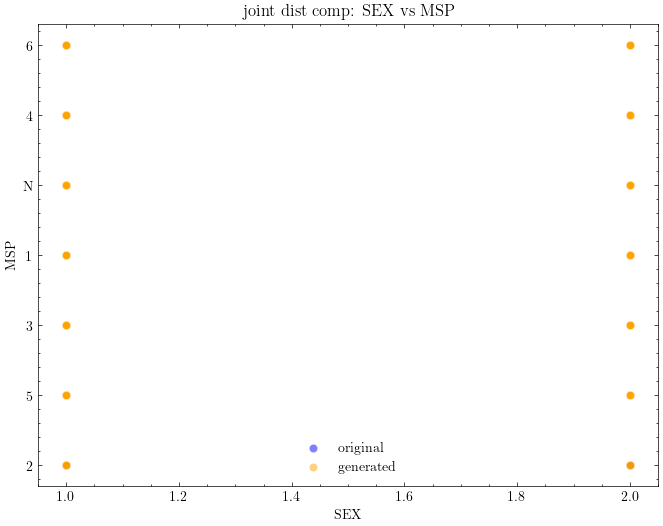

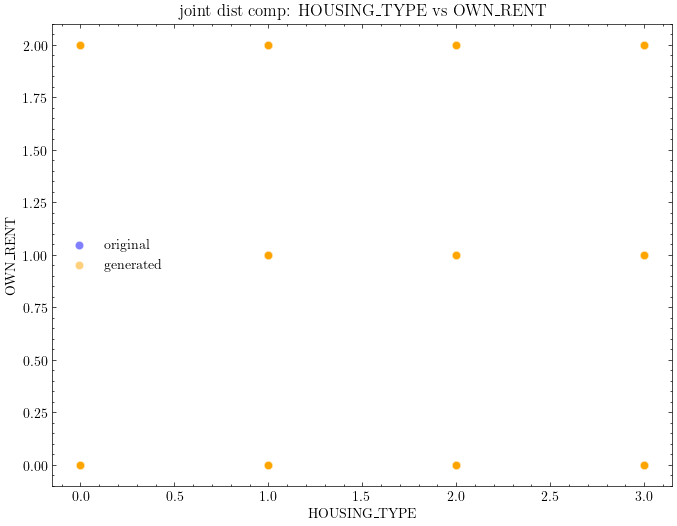

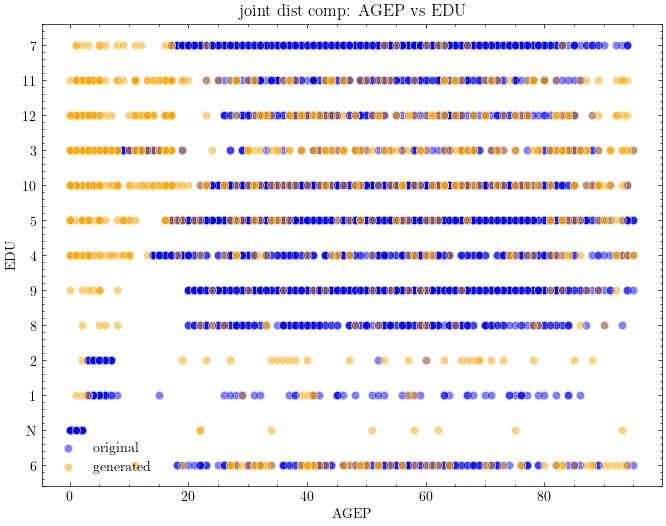

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import os
import scienceplots

plt.style.use('science')

original_data = pd.read_csv('../data/acs-2019-nist/national/national2019.csv')
# generated_data = pd.read_csv('output_data/agent_0_20241110_210355.csv')
generated_data = pd.read_csv('final_sampled_dataset.csv')

original_data = original_data.sample(n=5000, random_state=0)

columns_to_compare = ['AGEP', 'SEX', 'EDU', 'MSP', 'PINCP', 'HOUSING_TYPE', 'OWN_RENT', 'DENSITY']

for col in columns_to_compare:
    if col == 'PINCP':
        continue
    plt.figure(figsize=(8, 6))
    sns.histplot(original_data[col], color='blue', label='original', kde=True, stat='density', alpha=0.5)
    sns.histplot(generated_data[col], color='orange', label='generated', kde=True, stat='density', alpha=0.5)
    plt.title(f'hist comp for {col}')
    plt.xlabel(col)
    plt.ylabel('density')
    plt.legend()
    plt.show()


two_way_pairs = [('SEX', 'MSP'), ('HOUSING_TYPE', 'OWN_RENT'), ('AGEP', 'EDU')]

for col1, col2 in two_way_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=original_data, x=col1, y=col2, label='original', color='blue', alpha=0.5)
    sns.scatterplot(data=generated_data, x=col1, y=col2, label='generated', color='orange', alpha=0.5)
    plt.title(f'joint dist comp: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()
    plt.show()
